In [60]:
import pandas as pd

In [61]:
df = pd.read_csv('processes_datasets_run_tim.csv')

In [62]:
df

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,0,1136070024,203761,138467,138371,98652,259200
1,1,1136070690,0,11,4,35848,259200
2,2,1136071207,117,201203,0,0,259200
3,3,1136071267,4406,196985,0,0,259200
4,4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...,...
339309,404170,1167602999,1,41,17,0,259200
339310,404171,1167603618,2,56,18,0,259200
339311,404172,1167603624,1,57,17,61084,259200
339312,404173,1167603637,1,45,17,0,259200


In [4]:
df = df.iloc[0:, [1, 2, 3, 5, 6, 8]].copy()

In [5]:
df

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [6]:
df.corr()

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
SubmitTime,1.000000,0.049792,0.055988,0.051565,0.078524,-0.116449
WaitTime,0.049792,1.000000,0.082618,0.094106,0.037051,0.001670
RunTime,0.055988,0.082618,1.000000,0.864234,0.419717,0.274379
AverageCPUTimeUsed,0.051565,0.094106,0.864234,1.000000,0.447703,0.290692
Used Memory,0.078524,0.037051,0.419717,0.447703,1.000000,0.244945
ReqTime:,-0.116449,0.001670,0.274379,0.290692,0.244945,1.000000


In [7]:
df.columns = ["submit_time", 'wait_time', 'run_time', 'avg_cpu_time_used', 'used_mem', 'req_time']

In [8]:
df

,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [9]:
from matplotlib import pyplot as plt

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
import numpy as np

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Multivariate RNN

### Cleaning Data

In [14]:
import random

In [15]:
start = random.randint(0, 404175 - 12500)
start

331908

In [16]:
df = df.iloc[start:start+12500, :]

In [17]:
df = df.reset_index()

In [18]:
df

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,331908,1161278899,68472,161363,140136,325532,259200
1,331909,1161279014,10422,936,23,53480,26580
2,331910,1161279019,68355,142964,142284,260324,259200
3,331911,1161279024,59477,-1,-1,-1,-1
4,331912,1161279072,1739,2642,2093,730912,26580
...,...,...,...,...,...,...,...
12495,344403,1162211311,1,57,21,105428,259200
12496,344404,1162211331,2,67,20,184012,259200
12497,344405,1162211333,12697,63350,41344,1811700,259200
12498,344406,1162211348,21618,-1,-1,-1,-1


In [19]:
df.corr()

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
index,1.000000,0.998534,0.188057,0.085150,0.113448,-0.036600,0.147274
submit_time,0.998534,1.000000,0.183083,0.087230,0.115295,-0.029247,0.153870
wait_time,0.188057,0.183083,1.000000,0.201461,0.235452,-0.040879,0.102763
run_time,0.085150,0.087230,0.201461,1.000000,0.895977,0.356947,0.494722
avg_cpu_time_used,0.113448,0.115295,0.235452,0.895977,1.000000,0.391428,0.485685
used_mem,-0.036600,-0.029247,-0.040879,0.356947,0.391428,1.000000,0.428942
req_time,0.147274,0.153870,0.102763,0.494722,0.485685,0.428942,1.000000


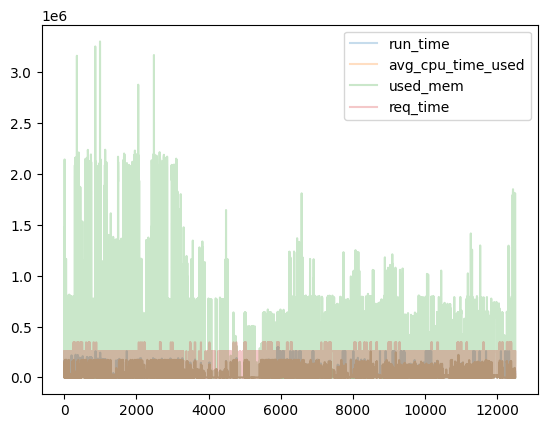

In [20]:
plt.plot(df['run_time'], alpha = 0.25, label = "run_time")
plt.plot(df['avg_cpu_time_used'], alpha = 0.25, label = "avg_cpu_time_used")
plt.plot(df['used_mem'], alpha = 0.25, label = "used_mem")
plt.plot(df['req_time'], alpha = 0.25, label = "req_time")
plt.legend()

In [21]:
for i, value in enumerate(df["avg_cpu_time_used"]):
    if value == -1:
        df["avg_cpu_time_used"][i] = df["avg_cpu_time_used"][i-1]
for i, value in enumerate(df["run_time"]):
    if value == -1:
        df["run_time"][i] = df["run_time"][i-1]
for i, value in enumerate(df["used_mem"]):
    if value == -1:
        df["used_mem"][i] = df["used_mem"][i-1]
for i, value in enumerate(df["req_time"]):
    if value == -1:
        df["req_time"][i] = df["req_time"][i-1]

In [22]:
run_time = df["run_time"]
avg_cpu_time_used = df["avg_cpu_time_used"]
used_mem = df["used_mem"]
req_time = df["req_time"]


run_time = scaler.fit_transform(run_time.values.reshape(-1, 1))
avg_cpu_time_used = scaler.fit_transform(avg_cpu_time_used.values.reshape(-1, 1))
used_mem = scaler.fit_transform(used_mem.values.reshape(-1, 1))
req_time = scaler.fit_transform(req_time.values.reshape(-1, 1))

In [23]:
df = {
    "run_time" : run_time.reshape(-1),
    "avg_cpu_time_used" : avg_cpu_time_used.reshape(-1),
    "used_mem" : used_mem.reshape(-1),
    "req_time" : req_time.reshape(-1),
    "pred_run" : run_time.reshape(-1)
}

In [24]:
df = pd.DataFrame(df)

In [25]:
df

,run_time,avg_cpu_time_used,used_mem,req_time,pred_run
0,0.540554,0.545894,0.098525,0.749565,0.540554
1,0.003136,0.000090,0.016186,0.075304,0.003136
2,0.478919,0.554262,0.078790,0.749565,0.478919
3,0.478919,0.554262,0.078790,0.749565,0.478919
4,0.008851,0.008153,0.221218,0.075304,0.008851
...,...,...,...,...,...
12495,0.000191,0.000082,0.031909,0.749565,0.000191
12496,0.000224,0.000078,0.055693,0.749565,0.000224
12497,0.212218,0.161054,0.548329,0.749565,0.212218
12498,0.212218,0.161054,0.548329,0.749565,0.212218


In [26]:
samples = 10
steps = 1
X = []
Y = []

for i in range(df.shape[0] - samples):
    X.append(df.iloc[i:i+samples, 0:4])
    Y.append(df.iloc[i+samples, 4:])
    
print("Testing data length is: ", len(X[0:1][0]), ': ', X[0:1])
print("Training data length is: ", len(Y[0:1]), ': ', Y[0:1])

Testing data length is:  10 :  [   run_time  avg_cpu_time_used  used_mem  req_time
0  0.540554           0.545894  0.098525  0.749565
1  0.003136           0.000090  0.016186  0.075304
2  0.478919           0.554262  0.078790  0.749565
3  0.478919           0.554262  0.078790  0.749565
4  0.008851           0.008153  0.221218  0.075304
5  0.008851           0.008153  0.221218  0.075304
6  0.013822           0.007986  0.221456  0.075304
7  0.527985           0.608452  0.090627  0.749565
8  0.503136           0.504879  0.100745  0.749565
9  0.197632           0.212813  0.648850  0.749565]
Training data length is:  1 :  [pred_run    0.197632
Name: 10, dtype: float64]


In [27]:
X = np.array(X)
Y = np.array(Y)

In [28]:
X, X.shape

(array([[[5.40554212e-01, 5.45894378e-01, 9.85254416e-02, 7.49565217e-01],
         [3.13553133e-03, 8.95956122e-05, 1.61862447e-02, 7.53043478e-02],
         [4.78918912e-01, 5.54261830e-01, 7.87896030e-02, 7.49565217e-01],
         ...,
         [5.27985287e-01, 6.08451593e-01, 9.06272321e-02, 7.49565217e-01],
         [5.03135531e-01, 5.04879065e-01, 1.00744543e-01, 7.49565217e-01],
         [1.97632272e-01, 2.12812952e-01, 6.48850498e-01, 7.49565217e-01]],
 
        [[3.13553133e-03, 8.95956122e-05, 1.61862447e-02, 7.53043478e-02],
         [4.78918912e-01, 5.54261830e-01, 7.87896030e-02, 7.49565217e-01],
         [4.78918912e-01, 5.54261830e-01, 7.87896030e-02, 7.49565217e-01],
         ...,
         [5.03135531e-01, 5.04879065e-01, 1.00744543e-01, 7.49565217e-01],
         [1.97632272e-01, 2.12812952e-01, 6.48850498e-01, 7.49565217e-01],
         [1.97632272e-01, 2.12812952e-01, 6.48850498e-01, 7.49565217e-01]],
 
        [[4.78918912e-01, 5.54261830e-01, 7.87896030e-02, 7.495652

In [29]:
threshold = round(0.98 * X.shape[0])
print('Threshold is', threshold)

Threshold is 12240


In [30]:
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY = X[threshold:], Y[threshold:]

In [31]:
trainX.shape, trainY.shape

((12240, 10, 4), (12240, 1))

In [32]:
def custom_loss(y_true, y_pred):
            
    return (tf.keras.losses.mean_squared_error(y_true, y_pred) + 1* tf.keras.losses.mean_absolute_error(y_true, y_pred))/2

In [47]:
def make_model():
    model = keras.Sequential()
    model.add(layers.GRU(50,
                      use_bias=True,
                        activation = 'relu',
                      input_shape=(trainX.shape[1], trainX.shape[2]),
                      return_sequences = True
                      )) 
    model.add(layers.GRU(10,
                          use_bias=True,
                         activation = 'relu',
                           return_sequences = True))
    model.add(layers.GRU(20,
                          activation = 'relu',
                       use_bias=True))
    #model.add(layers.Dropout(rate = 0.1))
    model.add(layers.Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
#     model.compile(loss=custom_loss, optimizer='adam')
    
    return model

In [48]:
model = make_model()

c:\python\python391\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ gru_3 (GRU)                        │ (None, 10, 50)                │       8,400 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ gru_4 (GRU)                        │ (None, 10, 10)                │       1,860 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ gru_5 (GRU)                        │ (None, 20)                    │       1,920 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 1)                     │          21 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 12,201 (47.66 KB)

 Trainable params: 12,201 (47.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle=False,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.02 ,
                    verbose=1)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1210 - val_loss: 0.0606
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0984 - val_loss: 0.0502
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0908 - val_loss: 0.0502
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0912 - val_loss: 0.0500
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0900 - val_loss: 0.0485


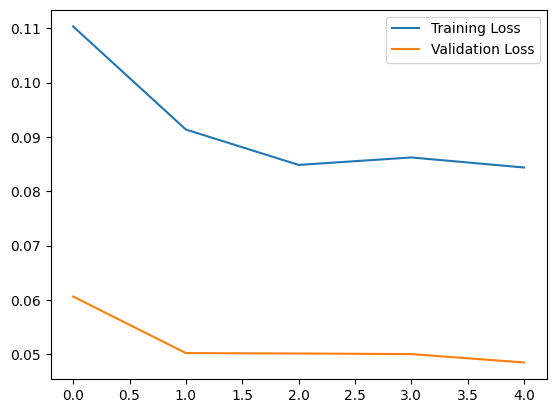

In [51]:
# tr_loss >> val_loss : underfitting
# tr_loss << val_loss : overfitting

plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


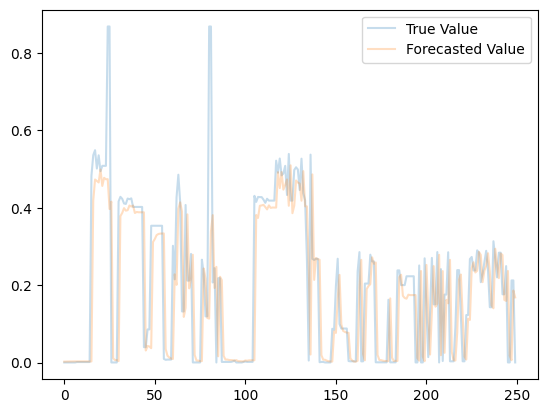

In [52]:
y_pred = model.predict(testX)
plt.plot(testY, alpha = 0.25, label = "True Value")
plt.plot(y_pred, alpha = 0.25, label = "Forecasted Value")
plt.legend()

In [53]:
#y_pred = scaler.fit_transform(y_pred)

In [54]:
#testY = scaler.fit_transform(testY)

In [ ]:
y_pred

In [55]:
rae = 0
for i in range(len(y_pred)):
    abs_val = abs(y_pred[i][0] - testY[i][0])
    rae += abs_val

rae = rae / len(y_pred)

In [56]:
rae

0.07882826606224333

In [57]:
rae * 100

7.882826606224333

In [58]:
final_df = pd.DataFrame({
    "testY" : testY.reshape(-1),
    "y_pred" : y_pred.reshape(-1)
})

In [59]:
final_df.corr()

,testY,y_pred
testY,1.000000,0.720913
y_pred,0.720913,1.000000


In [46]:
#model.save('mae_4.0_gru_model1.keras')